In [1]:
def res_app(nom_fichier):
    troisieme_colonne = []
    try:
        with open(nom_fichier, 'r') as f:
            lignes = f.readlines()
            for ligne in lignes:
                valeurs = ligne.split()
                if len(valeurs) >= 4:
                    z = float(valeurs[2])
                    troisieme_colonne.append(z)

        return troisieme_colonne

    except FileNotFoundError:
        print(f"Le fichier '{nom_fichier}' est introuvable.")
        return None
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")
        return None


In [3]:
import numpy as np
# HCP
noms_fichiers = ['H25-X0.xyz','H25-X15.xyz','H25-X30.xyz','H25-X45.xyz','H25-X60.xyz','H25-X75.xyz','H24-X90.xyz','H24-X105.xyz','H24-X120.xyz','H24-X135.xyz','H24-X150.xyz']

res_0 = res_app(noms_fichiers[0])
nb_0=len(res_0)
x_0= [0]*nb_0
y_0= np.linspace(10, 120, nb_0)

res_15 = res_app(noms_fichiers[1])
nb_15=len(res_15)
x_15= [15]*nb_15
y_15= np.linspace(10, 120, nb_15)

res_30 = res_app(noms_fichiers[2])
nb_30=len(res_30)
x_30= [30]*nb_30
y_30= np.linspace(10, 120, nb_30)

res_45 = res_app(noms_fichiers[3])
nb_45=len(res_45)
x_45= [45]*nb_45
y_45= np.linspace(10, 120, nb_45)

res_60 = res_app(noms_fichiers[4])
nb_60=len(res_60)
x_60= [60]*nb_60
y_60= np.linspace(10, 120, nb_60)

res_75 = res_app(noms_fichiers[5])
nb_75=len(res_75)
x_75= [75]*nb_75
y_75= np.linspace(10, 120, nb_75)

res_90 = res_app(noms_fichiers[6])
nb_90=len(res_90)
x_90= [90]*nb_90
y_90= np.linspace(10, 120, nb_90)

res_105 = res_app(noms_fichiers[7])
nb_105=len(res_105)
x_105= [105]*nb_105
y_105= np.linspace(10, 120, nb_105)

res_120 = res_app(noms_fichiers[8])
nb_120=len(res_120)
x_120= [120]*nb_120
y_120= np.linspace(10, 120, nb_120)

res_135 = res_app(noms_fichiers[9])
nb_135=len(res_135)
x_135= [135]*nb_135
y_135= np.linspace(10, 120, nb_135)

res_150 = res_app(noms_fichiers[10])
nb_150=len(res_150)
x_150= [150]*nb_150
y_150= np.linspace(10, 120, nb_150)


In [4]:
x_tot = []
y_tot = []
res_tot = []
# Concaténer les listes x et y
for x, y, res in zip([x_0, x_15, x_30, x_45, x_60, x_75, x_90, x_105, x_120, x_135, x_150], [y_0, y_15, y_30, y_45, y_60, y_75, y_90, y_105,y_120, y_135, y_150], [res_0, res_15, res_30, res_45, res_60,res_75,res_90,res_105, res_120, res_135, res_150]):
    x_tot.extend(x)
    y_tot.extend(y)
    res_tot.extend(res)


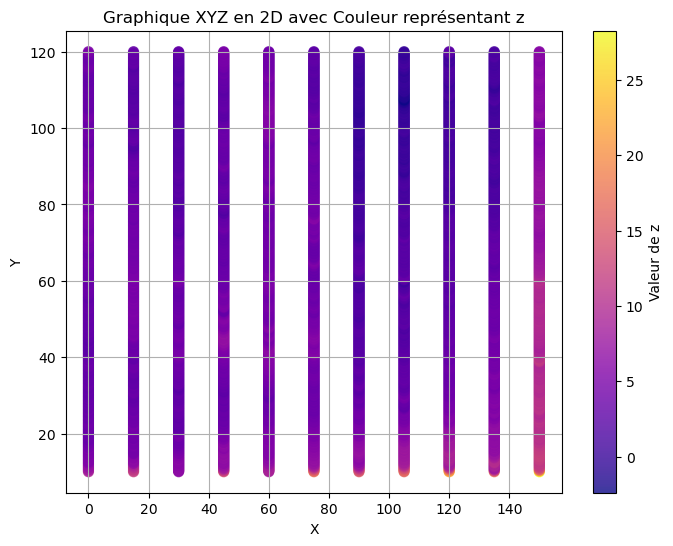

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importer la classe Axes3D pour créer des graphiques 3D
import numpy as np


x = x_tot
y = y_tot
z = res_tot

#données pour chaque ligne
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z, cmap='plasma', s=50, alpha=0.8)
plt.colorbar(label='Valeur de z')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graphique XYZ en 2D avec Couleur représentant z')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


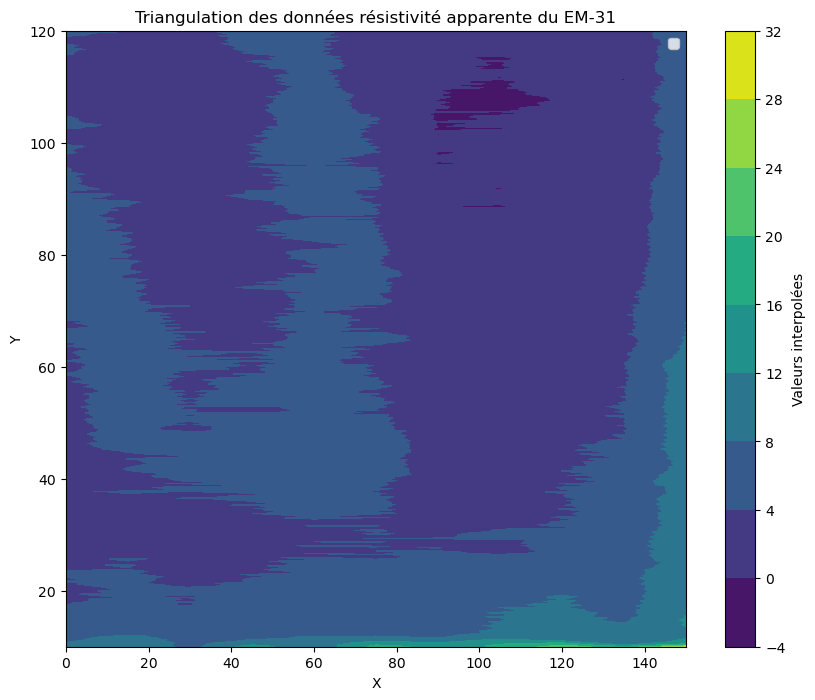

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri

x_tot = np.array(x_tot)
y_tot = np.array(y_tot)
res_tot = np.array(res_tot)
# Création de la triangulation
triang = tri.Triangulation(x_tot, y_tot)

# Interpolation des valeurs sur la triangulation
interpolator = tri.LinearTriInterpolator(triang, res_tot)
x, y = np.meshgrid(np.linspace(-10, 160, 100), np.linspace(-10, 130, 100))
z = interpolator(x, y)

# Affichage de la carte triangulée avec contours remplis
plt.figure(figsize=(10, 8))
plt.tricontourf(triang, res_tot, cmap='viridis')
plt.colorbar(label='Valeurs interpolées')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangulation des données résistivité apparente du EM-31')
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


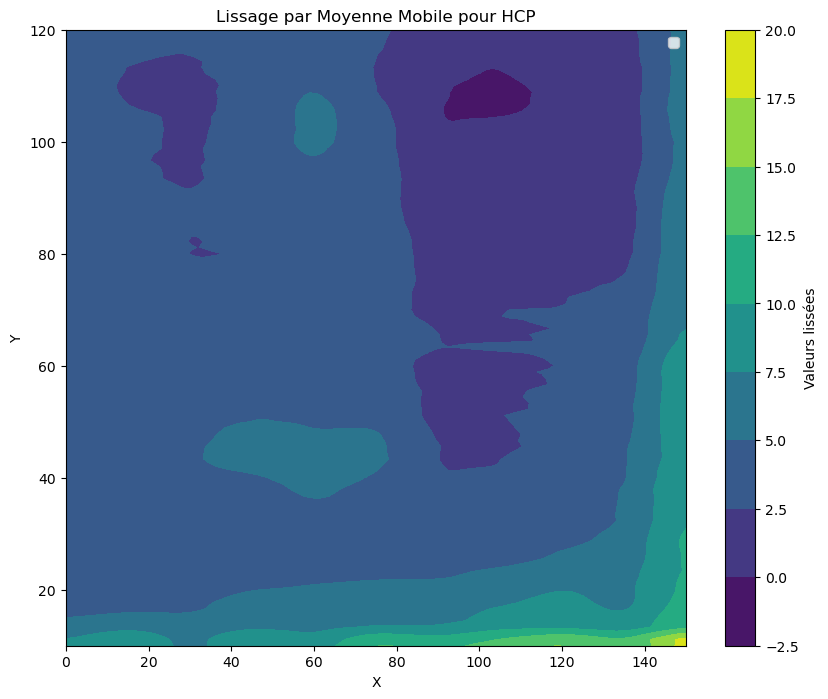

In [7]:
import numpy as np
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt

# Création d'une grille
x, y = np.meshgrid(np.linspace(x_tot.min(), x_tot.max(), 100),
                   np.linspace(y_tot.min(), y_tot.max(), 100))

# Interpolation des valeurs
interpolator = tri.LinearTriInterpolator(triang, res_tot)
z = interpolator(x, y)

# Application du filtre de moyenne mobile
window_size = 5  # Taille de la fenêtre de moyenne mobile
z_smooth = uniform_filter(z, size=window_size)

# Affichage
plt.figure(figsize=(10, 8))
plt.contourf(x, y, z_smooth, cmap='viridis')
plt.colorbar(label='Valeurs lissées')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lissage par Moyenne Mobile pour HCP')
plt.legend()

plt.show()

In [8]:
#VCP

noms_fichiers = ['V25-X0.xyz','V25-X15.xyz','V25-X30.xyz','V25-X45.xyz','V25-X60.xyz','V25-X75.xyz','V24-X90.xyz','V24-X105.xyz','V24-X120.xyz','V24-X135.xyz','V24-X150.xyz']

res_0 = res_app(noms_fichiers[0])
nb_0=len(res_0)
x_0= [0]*nb_0
y_0= np.linspace(120, 10, nb_0)

res_15 = res_app(noms_fichiers[1])
nb_15=len(res_15)
x_15= [15]*nb_15
y_15= np.linspace(120, 10, nb_15)

res_30 = res_app(noms_fichiers[2])
nb_30=len(res_30)
x_30= [30]*nb_30
y_30= np.linspace(120, 10, nb_30)

res_45 = res_app(noms_fichiers[3])
nb_45=len(res_45)
x_45= [45]*nb_45
y_45= np.linspace(120, 10, nb_45)

res_60 = res_app(noms_fichiers[4])
nb_60=len(res_60)
x_60= [60]*nb_60
y_60= np.linspace(120, 10, nb_60)

res_75 = res_app(noms_fichiers[5])
nb_75=len(res_75)
x_75= [75]*nb_75
y_75= np.linspace(120, 10, nb_75)

res_90 = res_app(noms_fichiers[6])
nb_90=len(res_90)
x_90= [90]*nb_90
y_90= np.linspace(120, 10, nb_90)

res_105 = res_app(noms_fichiers[7])
nb_105=len(res_105)
x_105= [105]*nb_105
y_105= np.linspace(120, 10, nb_105)

res_120 = res_app(noms_fichiers[8])
nb_120=len(res_120)
x_120= [120]*nb_120
y_120= np.linspace(120, 10, nb_120)

res_135 = res_app(noms_fichiers[9])
nb_135=len(res_135)
x_135= [135]*nb_135
y_135= np.linspace(120, 10, nb_135)

res_150 = res_app(noms_fichiers[10])
nb_150=len(res_150)
x_150= [150]*nb_150
y_150= np.linspace(120, 10, nb_150)

In [9]:
x_tot = []
y_tot = []
res_tot = []
# Concaténer les listes x et y
for x, y, res in zip([x_0, x_15, x_30, x_45, x_60, x_75, x_90, x_105, x_120, x_135, x_150], [y_0, y_15, y_30, y_45, y_60, y_75, y_90, y_105,y_120, y_135, y_150], [res_0, res_15, res_30, res_45, res_60,res_75,res_90,res_105, res_120, res_135, res_150]):
    x_tot.extend(x)
    y_tot.extend(y)
    res_tot.extend(res)

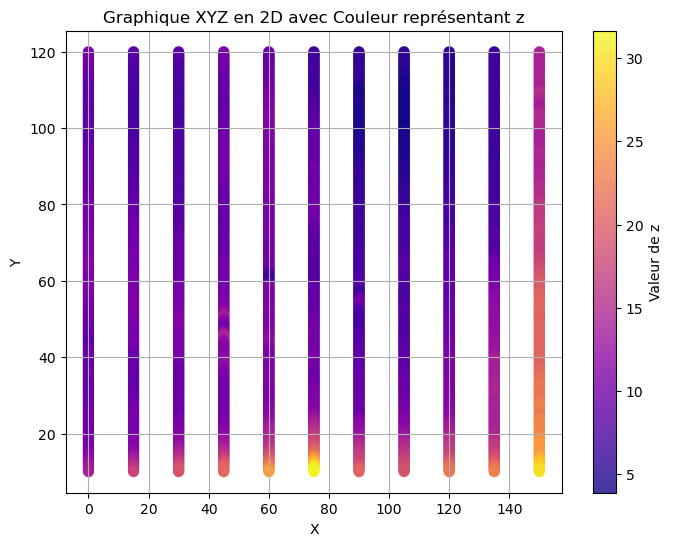

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importer la classe Axes3D pour créer des graphiques 3D
import numpy as np


x = x_tot
y = y_tot
z = res_tot


plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z, cmap='plasma', s=50, alpha=0.8)
plt.colorbar(label='Valeur de z')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graphique XYZ en 2D avec Couleur représentant z')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


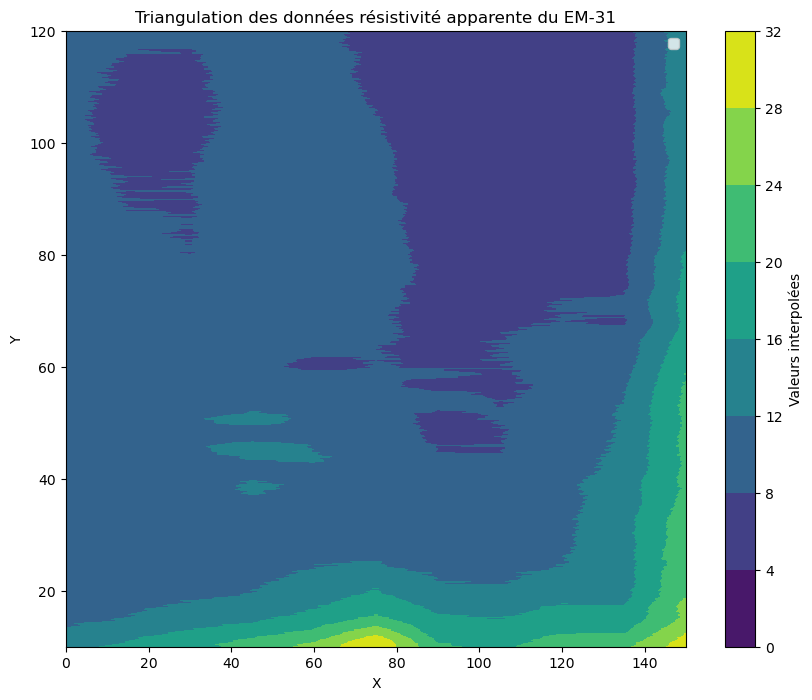

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri

x_tot = np.array(x_tot)
y_tot = np.array(y_tot)
res_tot = np.array(res_tot)
# Création de la triangulation
triang = tri.Triangulation(x_tot, y_tot)

# Interpolation des valeurs sur la triangulation
interpolator = tri.LinearTriInterpolator(triang, res_tot)
x, y = np.meshgrid(np.linspace(-10, 160, 100), np.linspace(-10, 130, 100))
z = interpolator(x, y)

# Affichage de la carte triangulée avec contours remplis
plt.figure(figsize=(10, 8))
plt.tricontourf(triang, res_tot, cmap='viridis')
plt.colorbar(label='Valeurs interpolées')
#plt.scatter(x_tot, y_tot, color='red', marker='x', s=0.1, label='Points de données')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangulation des données résistivité apparente du EM-31')
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


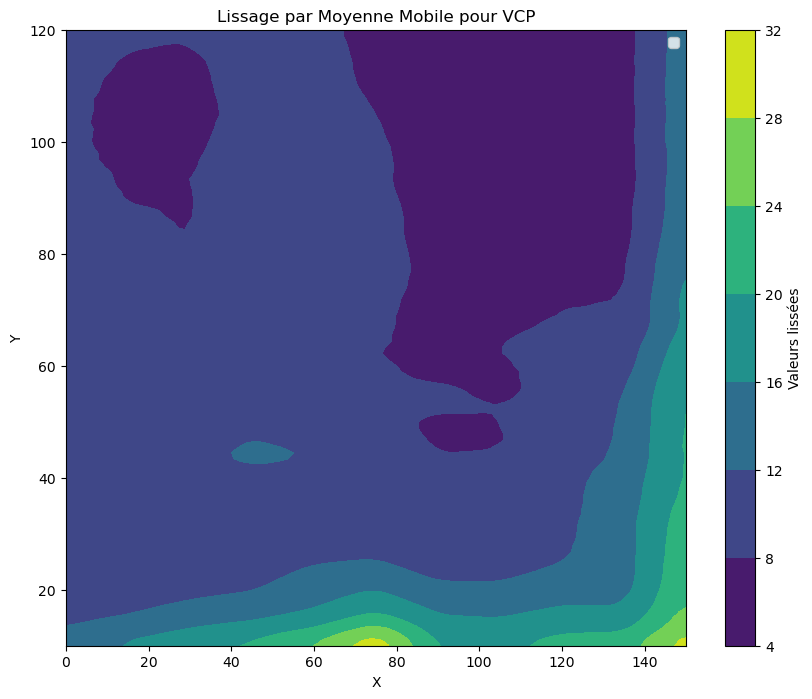

In [12]:
import numpy as np
from scipy.ndimage import uniform_filter
import matplotlib.pyplot as plt

# Création d'une grille
x, y = np.meshgrid(np.linspace(x_tot.min(), x_tot.max(), 100),
                   np.linspace(y_tot.min(), y_tot.max(), 100))

# Interpolation des valeurs
interpolator = tri.LinearTriInterpolator(triang, res_tot)
z = interpolator(x, y)

# Application du filtre de moyenne mobile
window_size = 5  # Taille de la fenêtre de moyenne mobile
z_smooth = uniform_filter(z, size=window_size)

# Affichage
plt.figure(figsize=(10, 8))
plt.contourf(x, y, z_smooth, cmap='viridis')
plt.colorbar(label='Valeurs lissées')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lissage par Moyenne Mobile pour VCP')
plt.legend()

plt.show()